## Second step, let's refactor and separate out logical components

Make it more understandable and follow a repeatable pattern.

# Imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np

from sklearn import neighbors, datasets

In [2]:
# magic  
%matplotlib inline 

# Input - Model

In [3]:
n_neighbors = 15
weights = 'uniform'
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

# Input - Data

In [4]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

# Configuration

In [5]:
step_size = .02 # used to be h
light_colors = ['#FFAAAA', '#AAFFAA', '#AAAAFF']
bold_colors = ['#FF0000', '#00FF00', '#0000FF']

# Fit 

Direct support options for the scikit-learn fit method

In [6]:
clf.fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),
                     np.arange(y_min, y_max, step_size))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Draw

The outputs from the fit method that are drawn by Matplotlib.

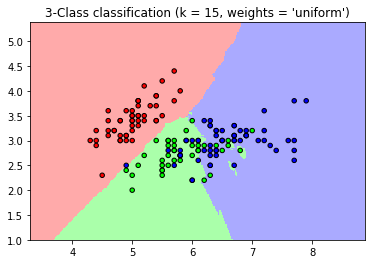

In [7]:
cmap_light = ListedColormap(light_colors)
cmap_bold = ListedColormap(bold_colors)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, 'uniform'))

plt.show()

# Common Reaction is: That's clean code, I can understand how it works!!!